# Introduction
In this notebook we are analysisng the outliers in time series.

**Identificación visual:** Una forma sencilla de detectar datos anómalos es mediante gráficos. Representa la serie de tiempo y observa si hay puntos que se desvían significativamente del patrón general. Los puntos extremos que se encuentran lejos de la tendencia general pueden considerarse anómalos.

**Estadísticas descriptivas:** Utiliza medidas estadísticas descriptivas, como la media y la desviación estándar, para identificar los datos que se encuentran fuera del rango esperado. Por ejemplo, puedes definir un umbral basado en la media más o menos un múltiplo de la desviación estándar y considerar los valores que superen ese umbral como anómalos.

**Métodos basados en modelos:** Los métodos de modelado estadístico y de aprendizaje automático pueden ser útiles para detectar datos anómalos en series de tiempo. Algunos enfoques comunes incluyen modelos de regresión, modelos ARIMA (Autoregressive Integrated Moving Average) y métodos de detección de anomalías basados en algoritmos de aprendizaje automático, como los bosques aleatorios o los autoencoders.

**Filtrado de datos:** En algunos casos, puede ser apropiado aplicar técnicas de filtrado para suavizar la serie de tiempo y reducir la influencia de los datos anómalos. Por ejemplo, puedes utilizar técnicas de suavizado exponencial, como el suavizado exponencial simple o el suavizado exponencial doble, para obtener una estimación más robusta de la tendencia.

Análisis de causas subyacentes: Además de detectar y manejar los datos anómalos, es importante comprender las posibles causas subyacentes de esas observaciones. Puedes realizar un análisis más detallado de los datos anómalos para determinar si son errores de medición, eventos inusuales o cambios significativos en el proceso que generó los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
# import numpy as np
import sys
sys.path.append('/code/src/')
from my_functions import time_series_interpolation, detect_anomalies, save_dataframe_as_csv

# Read data

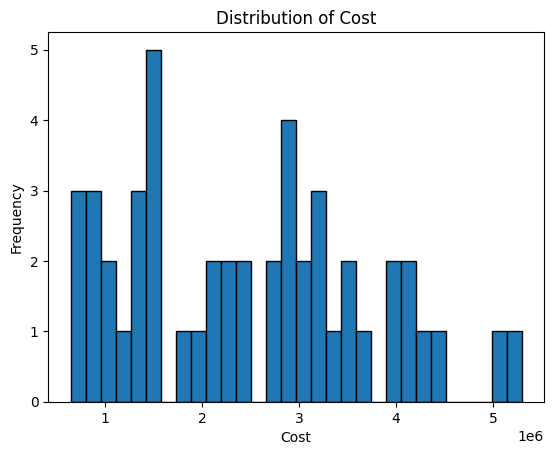

In [2]:
path_load = "../../data/"
file_name = "processed/df_time_monthly.csv"
full_path = path_load + file_name
df = pd.read_csv(full_path, parse_dates=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.hist(df['cost'], bins=30, edgecolor='black')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Cost')

# Mostrar el gráfico
plt.show()

Si tienes un conjunto de datos con una media (mean) de 2,351,288 pesos colombianos y una desviación estándar (std) de 1,205,166 pesos colombianos, hay varias cosas que puedes analizar:

Centralidad: La media es una medida de centralidad que indica el valor promedio de los datos. En este caso, la media es de 2,351,288 pesos colombianos. Esto significa que, en promedio, los valores tienden a agruparse alrededor de este número. Puedes utilizar esta medida para tener una idea general de la escala de los datos.

Variabilidad: La desviación estándar es una medida de dispersión que indica qué tan dispersos están los datos alrededor de la media. En este caso, la desviación estándar es de 1,205,166 pesos colombianos. Esto indica que los valores individuales pueden variar ampliamente en relación con la media. Una desviación estándar más alta implica una mayor dispersión de los datos.

Interpretación de la variabilidad: Dado que la desviación estándar es aproximadamente la mitad de la media, esto sugiere que hay una considerable variabilidad en los datos. Esto implica que los valores individuales pueden alejarse significativamente de la media y que puede haber una distribución asimétrica.

Distribución: Dado que conoces la media y la desviación estándar, podrías asumir una distribución normal y explorar gráficamente si los datos se ajustan a esta distribución. Sin embargo, ten en cuenta que la asunción de normalidad no es necesaria para realizar análisis.

Análisis de valores atípicos: Dado que la desviación estándar es relativamente alta en comparación con la media, es posible que existan valores atípicos o extremos en los datos. Puedes realizar un análisis adicional para identificar y evaluar estos valores atípicos y determinar si tienen un impacto significativo en tus análisis o si requieren una atención especial.

Recuerda que estos análisis iniciales te brindan una idea general sobre los datos, pero para realizar una interpretación completa y precisa, es importante considerar el contexto de los datos, el conocimiento del dominio y aplicar métodos estadísticos y de visualización apropiados.

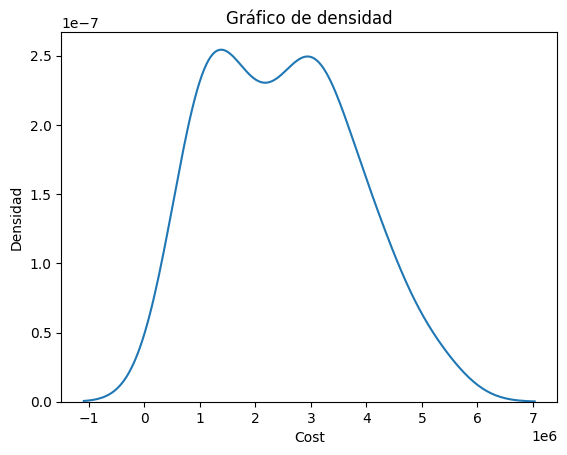

In [3]:
import seaborn as sns

sns.kdeplot(df['cost'])
plt.xlabel('Cost')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad')
plt.show()


Gráfico de densidad: Un gráfico de densidad muestra la distribución de probabilidad de los datos. Puedes utilizar la función sns.kdeplot() de la biblioteca seaborn para crear un gráfico de densidad.

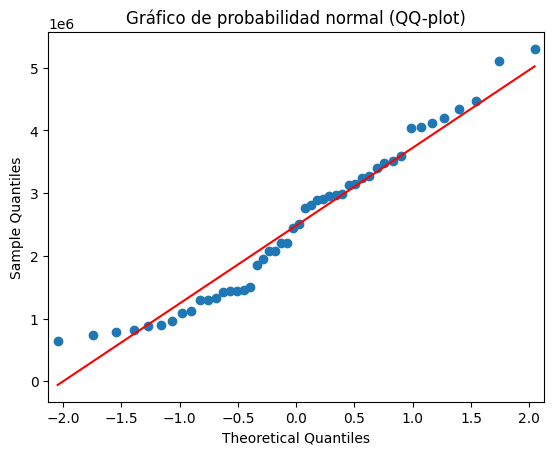

In [4]:
import statsmodels.api as sm

sm.qqplot(df['cost'], line='s')
plt.title('Gráfico de probabilidad normal (QQ-plot)')
plt.show()


Gráfico de probabilidad normal (QQ-plot): Un gráfico de probabilidad normal (QQ-plot) compara los cuantiles de tus datos con los cuantiles teóricos de una distribución normal. Si los puntos en el gráfico se alinean aproximadamente en una línea recta, esto indica una distribución normal.

## pruebas estadísticas

Existen varias pruebas estadísticas que puedes utilizar para confirmar si tus datos siguen una distribución normal. Aquí te presento dos pruebas comunes:

**Prueba de normalidad de Shapiro-Wilk:** La prueba de Shapiro-Wilk es una prueba de hipótesis que evalúa si una muestra de datos sigue una distribución normal. La hipótesis nula (H0) es que los datos se distribuyen normalmente. Puedes utilizar la función shapiro() de la biblioteca scipy.stats para realizar esta prueba.


In [5]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['cost'])
print('Estadístico de prueba:', stat)
print('Valor p:', p_value)
if p_value > 0.005:
    print('los datos siguen una distribución normal.')
else:
    print('los datos NO siguen una distribución normal.')
    

Estadístico de prueba: 0.9527926445007324
Valor p: 0.051702309399843216
los datos siguen una distribución normal.


Si el valor p es mayor que un nivel de significancia predefinido (por ejemplo, 0.05), no se rechaza la hipótesis nula y se puede considerar que los datos siguen una distribución normal.



**Prueba de normalidad de Kolmogorov-Smirnov:** La prueba de Kolmogorov-Smirnov (KS) también evalúa si una muestra de datos sigue una distribución normal. La hipótesis nula (H0) es que los datos se distribuyen normalmente. Puedes utilizar la función kstest() de la biblioteca scipy.stats para realizar esta prueba.

In [6]:
from scipy.stats import kstest

stat, p_value = kstest(df['cost'], 'norm')
print('Estadístico de prueba:', stat)
print('Valor p:', p_value)
if p_value > 0.005:
    print('los datos siguen una distribución normal.')
else:
    print('los datos NO siguen una distribución normal.')

Estadístico de prueba: 1.0
Valor p: 0.0
los datos NO siguen una distribución normal.


Al igual que en la prueba de Shapiro-Wilk, si el valor p es mayor que un nivel de significancia predefinido, no se rechaza la hipótesis nula y se puede considerar que los datos siguen una distribución normal.

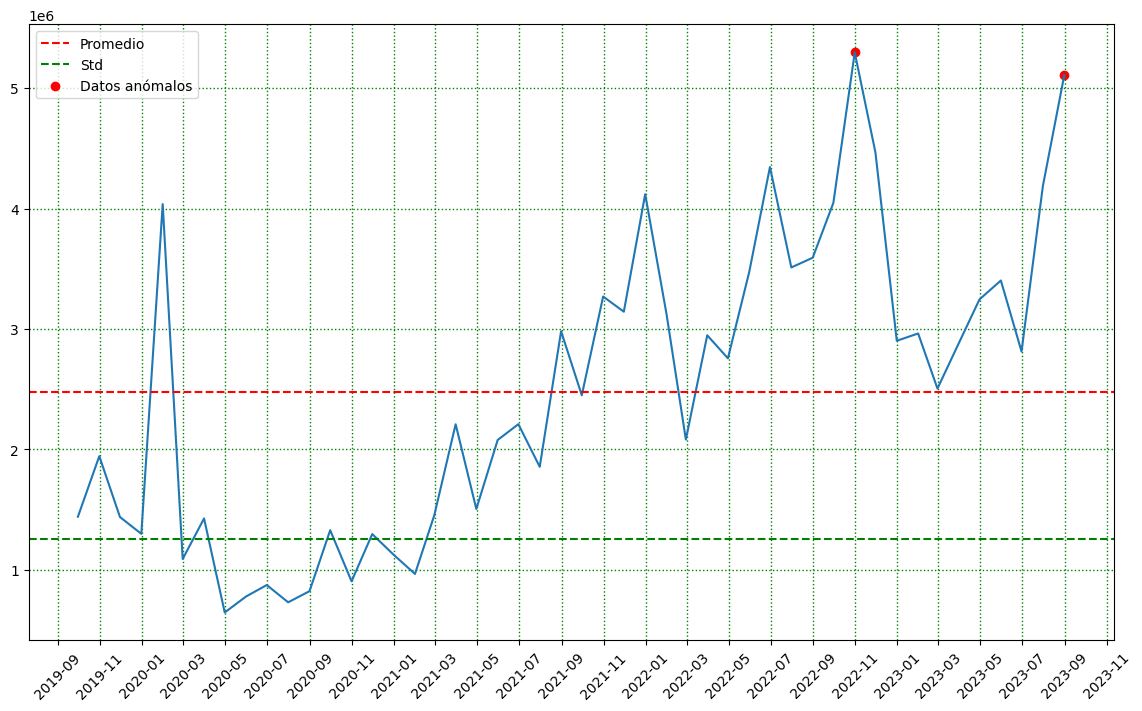

In [7]:
mean = df['cost'].mean()
std = df['cost'].std()
anomalies = detect_anomalies(df, 'cost')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df.index, df['cost'])
# Agregar la línea del promedio
plt.axhline(mean, color='r', linestyle='--', label='Promedio')
plt.axhline(std, color='g', linestyle='--', label='Std')
plt.scatter(anomalies.index, anomalies.cost, color='red', label='Datos anómalos')
# Establecer el formato del eje x para que muestre cada mes
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))

# Establecer el formato de las etiquetas del eje x
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
# trazar cuadricula
plt.grid(color='g', linestyle='dotted', linewidth=1)
plt.xticks(rotation = 45)
plt.legend()
# Mostrar el gráfico
plt.show()


In [8]:
imputed_series = time_series_interpolation(df['cost'], anomalies.index)

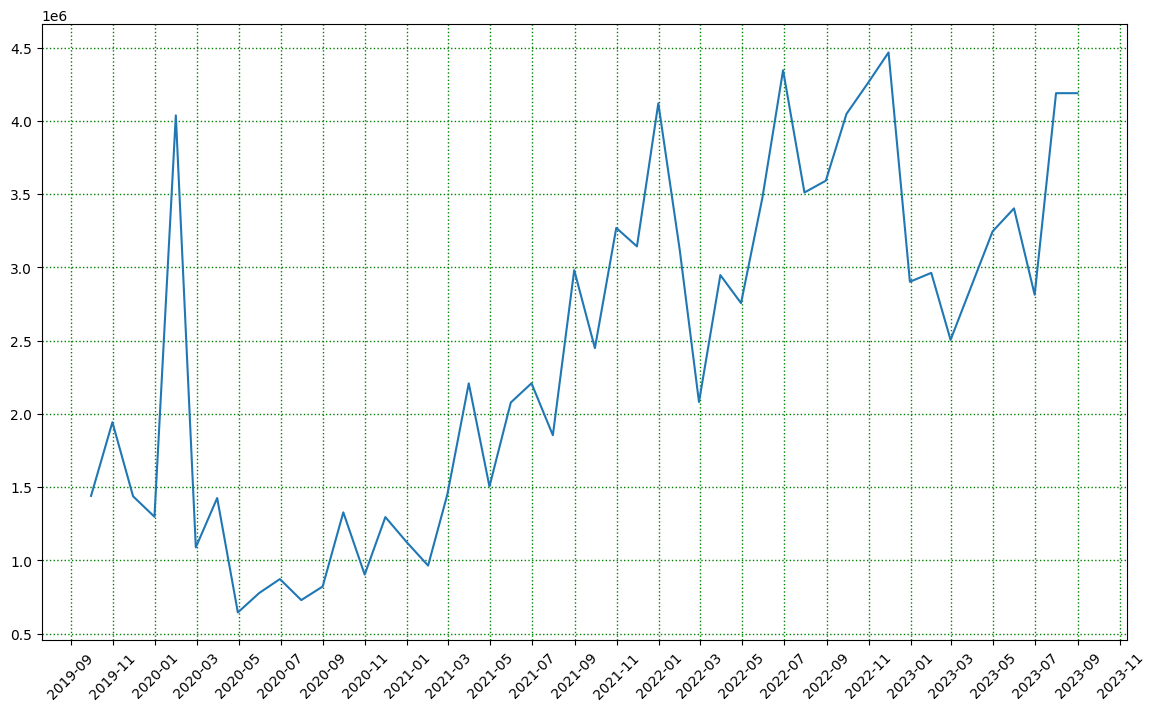

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(imputed_series.index, imputed_series)

# plt.scatter(anomalies.index, anomalies.values, color='red', label='Datos anómalos')
# # Establecer el formato del eje x para que muestre cada mes
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))

# # Establecer el formato de las etiquetas del eje x
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
# # trazar cuadricula
plt.grid(color='g', linestyle='dotted', linewidth=1)
plt.xticks(rotation = 45)

# Mostrar el gráfico
plt.show()

In [10]:
directory = path_load + 'processed'
file_df_name = '/df_time_monthly_without_outliers.csv'
df_time_without_outlier = df
df_time_without_outlier['cost'] = imputed_series
# Save the DataFrame to a CSV file
save_dataframe_as_csv(df_time_without_outlier, '../../data/processed', 'df_time_monthly_without_outliers.csv')
